In [6]:
# from src.data.DataLoader import *
from src.models.model import SemisupervisedVAE
from src.data.EMG_DataLoader import EMG_DataLoader
from src.validation.train import *
import torch.optim as optim
import torch.nn.functional as F

data_manipulator = EMG_DataLoader(1,[0,1])
data_manipulator.set_dataset()
data_manipulator.set_dataloader(30)
train_loader = data_manipulator.dataloader
model = SemisupervisedVAE(z_dim=2,y_dim=6,input_shape=180,device='cpu')
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [4]:
data_manipulator = EMG_DataLoader(1,[0])
data_manipulator.set_dataset()

In [5]:
data_manipulator.set_dataloader(30)
train_loader = data_manipulator.dataloader

In [11]:
print(len(train_loader.dataset))
i=0
# for data,label in train_loader:
#     break
# print(data.shape)
# print(label.shape)

for data,label in train_loader:
    i += 1
print(i)
# print(train_loader.dataset.size())
# i = 0

# for data, label in train_loader:
#     i += 1
# print(i)
# a = label.to(torch.int64)
# b = F.one_hot(label, num_classes=6)
# print(b)
# print(b)

3024
101


In [4]:
model = SemisupervisedVAE(z_dim=6,y_dim=6,input_shape=180,device='cpu')

In [5]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [3]:
loss_value = []
for epoch in range(50):
    loss,_ = train_epoch(model,train_loader,optimizer,epoch,device='cpu')
    loss_value.append(loss)



/home/yoneda/envs/yoneda_env/lib/python3.9/site-packages/torch/autograd/graph.py:744: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch #1: train loss = -0.4429, train acc = 0.8925
Epoch #2: train loss = -2.4269, train acc = 0.9593
Epoch #3: train loss = -2.5595, train acc = 0.9785
Epoch #4: train loss = -2.6996, train acc = 0.9795
Epoch #5: train loss = -2.8191, train acc = 0.9851
Epoch #6: train loss = -2.7803, train acc = 0.9818
Epoch #7: train loss = -2.7677, train acc = 0.9864
Epoch #8: train loss = -2.8680, train acc = 0.9828
Epoch #9: train loss = -2.7047, train acc = 0.9745
Epoch #10: train loss = -2.8899, train acc = 0.9874
Epoch #11: train loss = -2.7205, train acc = 0.9845
Epoch #12: train loss = -2.7633, train acc = 0.9868
Epoch #13: train loss = -2.8516, train acc = 0.9864
Epoch #14: train loss = -2.8607, train acc = 0.9848
Epoch #15: train loss = -2.7899, train acc = 0.9835
Epoch #16: train loss = -2.8566, train acc = 0.9795
Epoch #17: train loss = -2.7797, train acc = 0.9845
Epoch #18: train loss = -2.8280, train acc = 0.9897
Epoch #19: train loss = -2.7524, train acc = 0.9838
Epoch #20: train loss

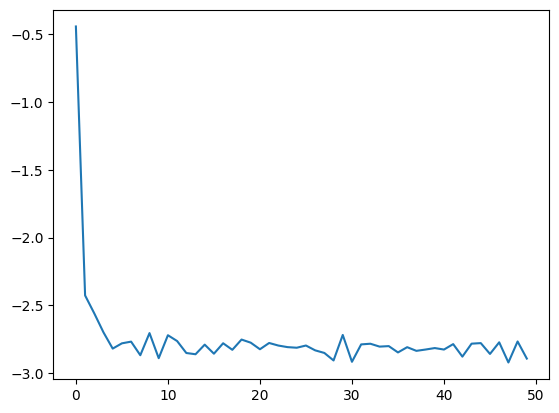

In [4]:
from matplotlib import pyplot as plt
import torch.nn.functional as F
# print(loss_value)
plt.plot(loss_value)
# for data, label in train_loader:
#     data = data.view(len(data),-1)
#     label = label.view(-1)
#     label = F.one_hot(label, num_classes=6)
#     z_mean, _ = model.qz_encoder(data, label)
#     z_mean = z_mean.detach().numpy()
#     ax.scatter(z_mean[:, 0], z_mean[:, 1])
    
    

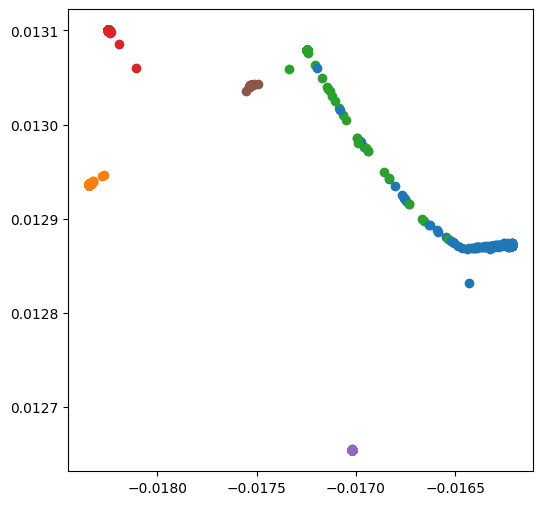

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

cm = plt.get_cmap("tab10")

for batch_idx, (data, label) in enumerate(train_loader):
    data = data.to('cpu')
    data = data.view(len(data),-1)
    label = label.view(-1)
    label_one_hot = F.one_hot(label, num_classes=6).float()
    _, y_prb = model.qy_encoder(data)
    mean, _ = model.qz_encoder(data, y_prb)
    # mean, logvar = model.qz_encoder(data,label_one_hot)
    z_mean = mean.cpu().detach().numpy()
    
    for k in range(6):
        cluster_idx = np.where(label.detach().numpy() == k)
        ax.scatter(z_mean[cluster_idx, 0], z_mean[cluster_idx, 1], color = cm(k))

    # ax.scatter(z_mean[:,0],z_mean[:,1])

#     for k in range(6):
#         cluster_idx = np.where(label.detach().numpy() == k)[0]
#         ax.scatter(z_mean[cluster_idx, 0], z_mean[cluster_idx, 1], marker=f"${k}$", color=cm(k))
# # ax.set_xlim = (0.028, 0.022)
#     # print(z_mean[:,0])  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

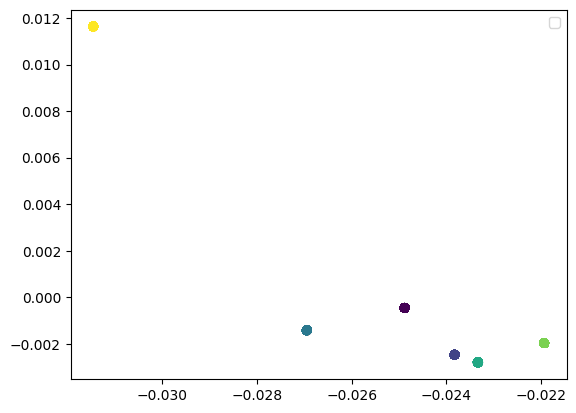

In [78]:
fig, ax = plt.subplots()
for data,label in train_loader:
    data = data.view(len(data),-1)
    label = label.view(-1)
    label = F.one_hot(label, num_classes=6).float()
    z_mean, _ = model.qz_encoder(data, label)
    z_mean = z_mean.detach().numpy()
    label = torch.argmax(label,axis=1).detach().numpy()
    ax.scatter(z_mean[:, 0], z_mean[:, 1], c=label)
    ax.legend()
    # print(z_mean.shape)
    # print(label.shape)
    # print(z_mean.shape)
    
#plt.scatter(z_mean[:,0],z_mean[:,1],)


In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

cm = plt.get_cmap("tab10")

for batch_idx, (data, label) in enumerate(data_loader):
    data = data.to(device)
    mean, logvar = model.encode(data)
    z_mean = mean.cpu().detach().numpy()

    for k in range(6):
        cluster_idx = np.where(label.detach().numpy() == k)[0]
        ax.scatter(z_mean[cluster_idx, 0], z_mean[cluster_idx, 1], marker=f"${k}$", color=cm(k))